In [1]:
import numpy as np
import scipy.linalg as la
from sympy import symbols, Eq, solve, diff
from pylab import plot, axis, title, subplot, show

def firsteq(x, y, z):
    return 3*(x - (x**3/3) + y + z)

def seceq(x, y):
    return (-1)*((x - 0.7 + 0.8*y)/ 3)

def myFunction(z):
    x, y = symbols('x y')

    eq1 = Eq(firsteq(x, y, z), 0)
    eq2 = Eq(seceq(x, y), 0)

    solve((eq1, eq2), (x, y), dict=True)

    sol_dict = solve((eq1,eq2), (x, y))
    a1 = sol_dict[0][0]
    a2 = sol_dict[0][1]
    return a1, a2

def findequil():
    size = [-2.0, -1.0, -0.5, 0,];
    for i in size:
        print("Equilibrium for " + str(i));
        x, y = myFunction(i)
        print('x = ' + str(x))
        print('y = ' + str(y))

findequil();

Equilibrium for -2.0
x = -1.33409398782240
y = 2.54261748477800
Equilibrium for -1.0
x = -0.408865836943412
y = 1.38608229617926
Equilibrium for -0.5
x = 0.804847747008334
y = -0.131059683760418
Equilibrium for 0
x = 1.19940803524404
y = -0.624260044055044


These are the values of x and y when looking at the equilibrium points

In [2]:
def partialderiv():
    x, y, z= symbols('x y z')
    fx = diff(firsteq(x, y, z), x)
    fy = diff(firsteq(x, y, z), y)
    gx = diff(seceq(x, y), x)
    gy = diff(seceq(x, y), y)
    print("Partial Derivative of x on the First Equation: " + str(fx))
    print("Partial Derivative of y on the First Equation: " + str(fy))
    print("Partial Derivative of x on the Second Equation: " + str(gx))
    print("Partial Derivative of y on the Second Equation: " + str(gy))
    stability(fx, fy, gx, gy);

def stability(x1, x2, x3, x4):
    values = [-1.33409398, -0.40886583, 0.8048477, 1.99408035]
    z = [-2.0, -1.0, -0.5, 0,]
    for i in range(0, 4):
        fx1 = 3 - 3 * (values[i]**2)
        A = np.array([[fx1, -0.333],[3, -0.26667]])
        eigvals, eigvecs = la.eig(A)
        print("Eigenvalues when z equals " + str(z[i]) + " : " + str(eigvals))
        maxval = abs(eigvals[0])
        col = 0
        for i in range(0, len(eigvals)):
            if(abs(eigvals[i]) > maxval):
                maxval = eigvals[i];
                col = i;
        print("Dominant Eiganvalue: " + str(maxval))

partialderiv();

Partial Derivative of x on the First Equation: 3 - 3*x**2
Partial Derivative of y on the First Equation: 3
Partial Derivative of x on the Second Equation: -1/3
Partial Derivative of y on the Second Equation: -0.266666666666667
Eigenvalues when z equals -2.0 : [-1.57704036+0.j -1.02904988+0.j]
Dominant Eiganvalue: 1.5770403617868125
Eigenvalues when z equals -1.0 : [2.07116838+0.j 0.16064782+0.j]
Dominant Eiganvalue: 2.07116837901899
Eigenvalues when z equals -0.5 : [0.39499527+0.74913221j 0.39499527-0.74913221j]
Dominant Eiganvalue: 0.8468886195683786
Eigenvalues when z equals 0 : [-8.81216563+0.j -0.38357369+0.j]
Dominant Eiganvalue: 8.81216563354329


In this section of the code we have found the Jacobian Matrix for the given problem. 
For the Jacobian Matrix, I have inserted the values that we needed when z = -2.0, -1.0, -0.5, 0.
After that we find the eigen values for each of the Jacobian Matrices created and then distinguish the dominant eigen value. 
By the distinguished dominant eigen value, we can find the critical thresholds. 
The critcal thresholds are when z = -1.0 and -0.5. That is beccause their values are non-zero imaginery values.

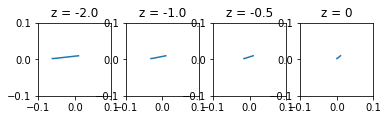

In [3]:
Dt = 0.01
def initialize():
    global u, uresult, v, vresult
    u = v = 0.01
    uresult = [u]
    vresult = [v]

def observe():
    global u, uresult, v, vresult
    uresult.append(u)
    vresult.append(v)

def update():
    global u, uresult, v, vresult
    nextx = 3*(u - (u**3/3) + v + z) * Dt
    nexty = (-1)*((u - 0.7 + 0.8*v)/ 3) * Dt
    u, v = nextx, nexty

def plot_phase_space():
    initialize()
    for t in range(10000):
        update()
        observe()
    plot(uresult, vresult)
    axis('image')
    axis([-0.1, 0.1, -0.1, 0.1])
    title('z = ' + str(z))

zs = [-2.0, -1.0, -0.5, 0]
for i in range(len(zs)):
    subplot(1, len(zs), i + 1)
    z = zs[i]
    plot_phase_space()

show()

Here is what I can display about the bifurcation. I had struggled to display this diagram. To know eaxactly how to display it. 
I took the example from the textbook section talking about the hopf bifurcations. 
Overall I found the assignment interesting, but I did struggle with the assignment but I am learning and going to be prepared for the next one.